In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency,f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,r2_score
from sklearn.ensemble import RandomForestClassifier
import warnings
import os
from pathlib import Path
import seaborn as sns

In [ ]:
# Go to base folder of the project from the current file deitory- one lave up
root_folder_path=Path.cwd().parent
root_folder_path

WindowsPath('c:/Users/dhiraj_choudhary/Music/Credit-Risk-Modelling')

In [27]:
#Go to Raw data folder
raw_data_folder=root_folder_path/'data'/'raw_data'
raw_data_folder

WindowsPath('c:/Users/dhiraj_choudhary/Music/Credit-Risk-Modelling/data/raw_data')

In [30]:
# read the internal data as well as credit bearue one
internal_data_cust=pd.read_excel(raw_data_folder/'Internal_data_Bank.xlsx')
cibil_data_cust=pd.read_excel(raw_data_folder/'Cibil_Data_External.xlsx')

In [109]:
internal_data_cust.shape

(51336, 26)

In [110]:
cibil_data_cust.shape

(51336, 62)

In [128]:
#create a copy to avoid reload origion data
df_internal_data_cust=internal_data_cust.copy()
df_cibil_data_cust=cibil_data_cust.copy()

In [112]:
df_internal_data_cust.sample(5)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
38122,38123,1,0,1,0,0,0.000,0.000,1.000,0.000,...,0,0,0,1,0,1,0,0,15,15
49181,49182,3,1,2,1,1,0.333,0.333,0.667,0.333,...,0,1,0,0,0,2,1,2,11,5
37797,37798,3,2,1,1,0,0.333,0.000,0.333,0.667,...,0,0,0,0,0,3,0,3,47,4
2085,2086,5,1,4,2,0,0.400,0.000,0.800,0.200,...,1,2,0,0,2,0,5,0,135,4
39136,39137,19,19,0,0,1,0.000,0.053,0.000,1.000,...,0,0,17,0,0,19,0,0,104,17


In [113]:
df_internal_data_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [114]:
df_internal_data_cust.shape

(51336, 26)

In [115]:
df_cibil_data_cust.sample(5)

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
33887,33888,1057,32,13,13,72,71,0,0,0,...,0.0,0.0,0.0,-99999.000,1,0,others,others,706,P1
16578,16579,60,-99999,-99999,0,-99999,0,0,0,0,...,1.0,0.0,1.0,1.305,0,0,ConsumerLoan,ConsumerLoan,678,P2
24388,24389,69,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.783,0,0,others,ConsumerLoan,692,P2
16650,16651,45,-99999,-99999,0,-99999,0,0,0,0,...,0.5,1.0,0.5,2.919,0,0,ConsumerLoan,ConsumerLoan,641,P4
9700,9701,42,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,ConsumerLoan,AL,676,P2


In [116]:
df_cibil_data_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [117]:
df_cibil_data_cust.shape

(51336, 62)

In [118]:
df_internal_data_cust.shape

(51336, 26)

#### EDA

##### Null value Analysis

In [119]:
#Check for null value precentage in each column in file -df_internal_data_cust
null_count_internal_data_cust=((df_internal_data_cust==-99999).sum()/len(df_internal_data_cust)*100).sort_values(ascending=False)
null_count_internal_data_cust

Age_Newest_TL           0.077918
Age_Oldest_TL           0.077918
Total_TL                0.000000
Other_TL                0.000000
Unsecured_TL            0.000000
Secured_TL              0.000000
PL_TL                   0.000000
Home_TL                 0.000000
Gold_TL                 0.000000
Consumer_TL             0.000000
CC_TL                   0.000000
Auto_TL                 0.000000
Tot_Missed_Pmnt         0.000000
PROSPECTID              0.000000
pct_tl_open_L12M        0.000000
Tot_TL_closed_L12M      0.000000
Total_TL_opened_L12M    0.000000
pct_closed_tl           0.000000
pct_active_tl           0.000000
pct_tl_closed_L6M       0.000000
pct_tl_open_L6M         0.000000
Tot_TL_closed_L6M       0.000000
Total_TL_opened_L6M     0.000000
Tot_Active_TL           0.000000
Tot_Closed_TL           0.000000
pct_tl_closed_L12M      0.000000
dtype: float64

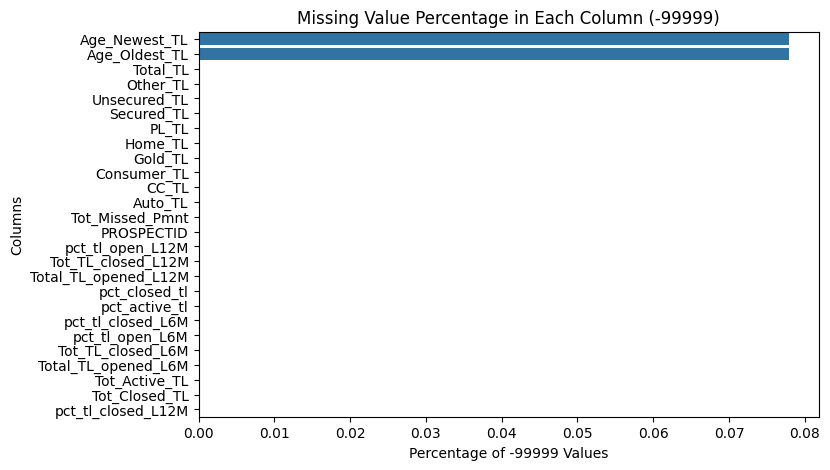

In [120]:

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(y=null_count_internal_data_cust.index, x=null_count_internal_data_cust.values,orient='h')

# Labels and title
plt.xlabel("Percentage of -99999 Values")
plt.ylabel("Columns")
plt.title("Missing Value Percentage in Each Column (-99999)")

plt.show()

In [121]:
#Check for null value precentage in each column in file -df_cibil_data_cust
null_count_cibil_data_cust=((df_cibil_data_cust==-99999).sum()/len(df_cibil_data_cust)*100).sort_values(ascending=False)
null_count_cibil_data_cust

CC_utilization                  92.792582
PL_utilization                  86.557192
time_since_first_deliquency     70.026882
time_since_recent_deliquency    70.026882
max_delinquency_level           70.026882
                                  ...    
num_dbt_12mts                    0.000000
num_lss                          0.000000
num_lss_6mts                     0.000000
num_lss_12mts                    0.000000
Approved_Flag                    0.000000
Length: 62, dtype: float64

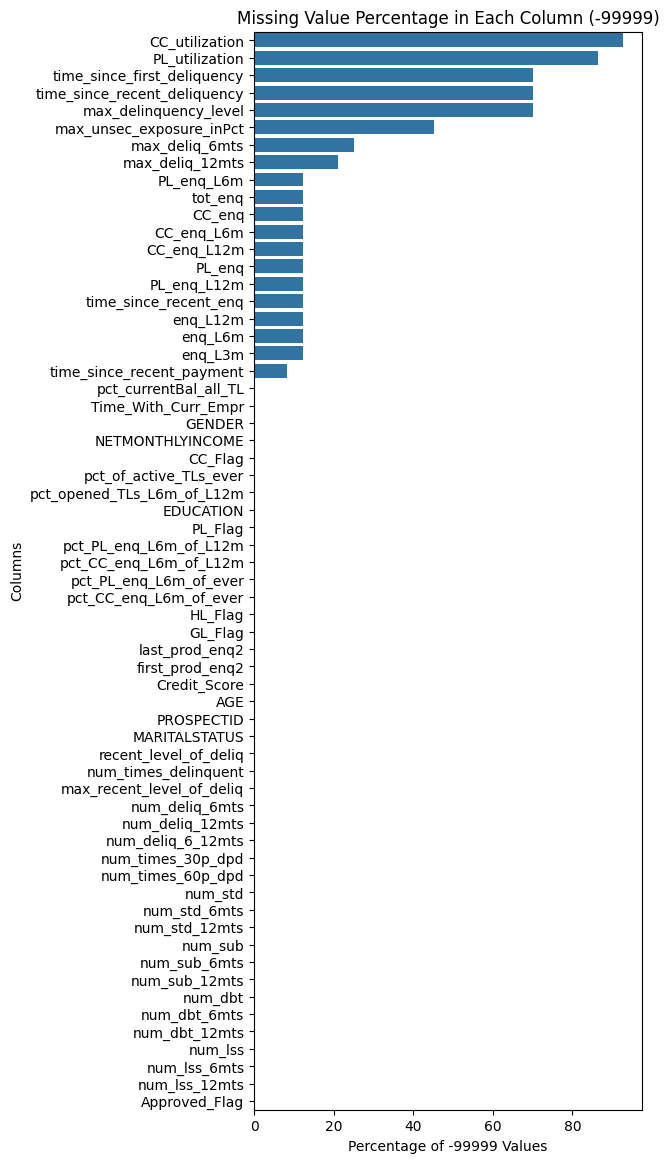

In [122]:
# Plot the bar chart
plt.figure(figsize=(5, 14))
sns.barplot(y=null_count_cibil_data_cust.index, x=null_count_cibil_data_cust.values,orient='h')

# Labels and title
plt.xlabel("Percentage of -99999 Values")
plt.ylabel("Columns")
plt.title("Missing Value Percentage in Each Column (-99999)")

# # Show the values on top of bars
# for index, value in enumerate(null_count_internal_data_cust.values):
#     plt.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=12)

plt.show()

#### Null Removal startegy

In [ ]:
#For df_internal_data_cust we have very less null value so we will drop those rows.
#For df_cibil_data_cust - we will remove those column where null value is more than 20%  - so that we have enough data and we have otehr delequency to work with.
#For df_cibil_data_cust - onece column will be removed we will drop all the row with - 99999 value

In [ ]:
# #df_internal_data_cust - Null removal
# df_internal_data_cust = df_internal_data_cust.loc[df_internal_data_cust['Age_Oldest_TL'] != -99999]

In [131]:
#create the function to remove df_internal_data_cust
def null_removal_df_internal_data_cust(df):
    df_internal_data_cust_final=df_internal_data_cust.loc[df_internal_data_cust['Age_Oldest_TL'] != -99999]
    return df_internal_data_cust_final

In [132]:
df_internal_data_cust=null_removal_df_internal_data_cust(df_internal_data_cust)

In [133]:
df_internal_data_cust.shape

(51296, 26)

In [134]:
((df_internal_data_cust==-99999).sum()/len(df_internal_data_cust)*100).sort_values(ascending=False)

PROSPECTID              0.0
Total_TL                0.0
Age_Oldest_TL           0.0
Other_TL                0.0
Unsecured_TL            0.0
Secured_TL              0.0
PL_TL                   0.0
Home_TL                 0.0
Gold_TL                 0.0
Consumer_TL             0.0
CC_TL                   0.0
Auto_TL                 0.0
Tot_Missed_Pmnt         0.0
pct_tl_closed_L12M      0.0
pct_tl_open_L12M        0.0
Tot_TL_closed_L12M      0.0
Total_TL_opened_L12M    0.0
pct_closed_tl           0.0
pct_active_tl           0.0
pct_tl_closed_L6M       0.0
pct_tl_open_L6M         0.0
Tot_TL_closed_L6M       0.0
Total_TL_opened_L6M     0.0
Tot_Active_TL           0.0
Tot_Closed_TL           0.0
Age_Newest_TL           0.0
dtype: float64

In [135]:
#df_cibil_data_cust - Null removal column details
threshold = 20 
# Loop through all columns and drop those with >20% -99999 values
columns_to_drop = []
for col in df_cibil_data_cust.columns:
    null_percentage = (df_cibil_data_cust[col] == -99999).sum() / len(df_cibil_data_cust) * 100
    if null_percentage > threshold:
        columns_to_drop.append(col)

In [136]:
columns_to_drop

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [ ]:
# #df_cibil_data_cust - Null removal
# threshold = 20 
# # Loop through all columns and drop those with >20% -99999 values
# columns_to_drop = []
# for col in df_cibil_data_cust.columns:
#     null_percentage = (df_cibil_data_cust[col] == -99999).sum() / len(df_cibil_data_cust) * 100
#     if null_percentage > threshold:
#         columns_to_drop.append(col)
# # Drop the identified columns
# df_cibil_data_cust.drop(columns=columns_to_drop, inplace=True)
# # Step 2: Drop rows where any remaining column contains -99999
# df_cibil_data_cust = df_cibil_data_cust[df_cibil_data_cust.ne(-99999).all(axis=1)]

In [137]:
#create function for null removal of df_cibil_data_cust

def null_removal_df_cibil_data_cust(df):
    threshold = 20 
    # Loop through all columns and drop those with >20% -99999 values
    columns_to_drop = []
    for col in df_cibil_data_cust.columns:
        null_percentage = (df_cibil_data_cust[col] == -99999).sum() / len(df_cibil_data_cust) * 100
        if null_percentage > threshold:
            columns_to_drop.append(col)
    # Drop the identified columns
    df_cibil_data_cust.drop(columns=columns_to_drop, inplace=True)
    # Step 2: Drop rows where any remaining column contains -99999
    df_cibil_data_cust_final = df_cibil_data_cust[df_cibil_data_cust.ne(-99999).all(axis=1)]
    return df_cibil_data_cust_final


In [138]:
df_cibil_data_cust=null_removal_df_cibil_data_cust(df_cibil_data_cust)

In [139]:
df_cibil_data_cust.shape

(42066, 54)

In [140]:
df_cibil_data_cust.columns

Index(['PROSPECTID', 'time_since_recent_payment', 'num_times_delinquent',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd',
       'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss',
       'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq',
       'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m',
       'PL_enq_L12m', 'time_since_recent_enq', 'enq_L12m', 'enq_L6m',
       'enq_L3m', 'MARITALSTATUS', 'EDUCATION', 'AGE', 'GENDER',
       'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_of_active_TLs_ever',
       'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_Flag',
       'PL_Flag', 'pct_PL_enq_L6m_of_L12m', 'pct_CC_enq_L6m_of_L12m',
       'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever', 'HL_Flag',
       'GL_Flag', 'last_prod_enq2', 'first_prod_enq2', '

In [141]:
((df_cibil_data_cust==-99999).sum()/len(df_cibil_data_cust)*100).sort_values(ascending=False)

PROSPECTID                    0.0
pct_opened_TLs_L6m_of_L12m    0.0
time_since_recent_enq         0.0
enq_L12m                      0.0
enq_L6m                       0.0
enq_L3m                       0.0
MARITALSTATUS                 0.0
EDUCATION                     0.0
AGE                           0.0
GENDER                        0.0
NETMONTHLYINCOME              0.0
Time_With_Curr_Empr           0.0
pct_of_active_TLs_ever        0.0
pct_currentBal_all_TL         0.0
time_since_recent_payment     0.0
CC_Flag                       0.0
PL_Flag                       0.0
pct_PL_enq_L6m_of_L12m        0.0
pct_CC_enq_L6m_of_L12m        0.0
pct_PL_enq_L6m_of_ever        0.0
pct_CC_enq_L6m_of_ever        0.0
HL_Flag                       0.0
GL_Flag                       0.0
last_prod_enq2                0.0
first_prod_enq2               0.0
Credit_Score                  0.0
PL_enq_L12m                   0.0
PL_enq_L6m                    0.0
PL_enq                        0.0
CC_enq_L12m   

#### Merge two datasets

In [142]:
df_cibil_data_cust.sample(2)

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
20300,20301,282,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,ConsumerLoan,ConsumerLoan,686,P2
25564,25565,58,9,217,3,3,0,6,5,22,...,0.0,0.0,0.0,0.0,1,0,ConsumerLoan,AL,713,P1


In [143]:
df_internal_data_cust.sample(2)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
32012,32013,4,3,1,1,0,0.25,0.0,0.25,0.75,...,0,0,0,0,0,4,0,3,93,5
25087,25088,3,0,3,0,0,0.00,0.0,1.00,0.00,...,0,0,2,0,0,3,0,0,29,10


In [144]:
# Merge the two dataframes, inner join so that no nulls are present
def merge_df(df1,df2):
     df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )
     return df

In [145]:
df_final_data_cust=merge_df(df_internal_data_cust,df_cibil_data_cust)

In [148]:
df_final_data_cust.shape

(42064, 79)

In [149]:
df_final_data_cust.sample(5)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
31186,38068,3,2,1,0,1,0.0,0.333,0.333,0.667,...,0.333,0.0,0.25,0.0,1,0,PL,AL,693,P2
30086,36723,4,1,3,0,0,0.0,0.000,0.750,0.250,...,0.000,0.0,0.00,0.0,0,0,ConsumerLoan,ConsumerLoan,695,P2
28113,34278,3,3,0,0,1,0.0,0.333,0.000,1.000,...,0.000,0.0,0.00,0.0,0,0,ConsumerLoan,ConsumerLoan,675,P2
19846,24247,2,1,1,1,1,0.5,0.500,0.500,0.500,...,1.000,0.0,1.00,0.0,0,0,ConsumerLoan,ConsumerLoan,649,P4
24594,30053,1,0,1,0,0,0.0,0.000,1.000,0.000,...,0.000,0.0,0.00,0.0,0,0,ConsumerLoan,others,666,P3


In [151]:
df_final_data_cust.dtypes

PROSPECTID              int64
Total_TL                int64
Tot_Closed_TL           int64
Tot_Active_TL           int64
Total_TL_opened_L6M     int64
                        ...  
GL_Flag                 int64
last_prod_enq2         object
first_prod_enq2        object
Credit_Score            int64
Approved_Flag          object
Length: 79, dtype: object

In [152]:
df_final_data_cust.shape

(42064, 79)

##### Feature selection 

##### As we have 79 features so we will will use Chi2(cat to cat),Anova(cat vs num - as we have 4 cat here),VIF ( varience indflation factor for Multicoliniariry)

In [153]:
# check how many columns are categorical
for i in df_final_data_cust.columns:
    if df_final_data_cust[i].dtype == 'object':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


##### Chi2 test - cat vs cat - Null hypothesis- Not assosicated

In [181]:
# Chi-square test
cat_columns_chi2 = []
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df_final_data_cust[i], df_final_data_cust['Approved_Flag']))
    if pval <=0.05:
        cat_columns_chi2.append(i)

In [182]:
cat_columns_chi2

['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']

Observation - As we have all the value less than 0.05 so we will consider all the cat features

##### Num vs Num -for multicoliniarity check for all the num features using VIF

In [165]:
# numerical columns list
numeric_columns = []
for i in df_final_data_cust.columns:
    if df_final_data_cust[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)

In [166]:
numeric_columns

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'num_times_delinquent',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',

In [167]:
len(numeric_columns)

72

In [168]:
# Apply sequential VIf for nyumerical columns
# numerical columns list
numeric_columns = []
columns_to_be_kept = []
for i in df_final_data_cust.columns:
    if df_final_data_cust[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)
vif_data = df_final_data_cust[numeric_columns]
total_columns = vif_data.shape[1]
column_index = 0
for i in range (0,total_columns):  
    vif_value = variance_inflation_factor(vif_data, column_index)
    # print (column_index,'---',vif_value)
    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1
    else:
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)

c:\Users\dhiraj_choudhary\AppData\Local\miniconda3\envs\risk_modelling_3.8\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\dhiraj_choudhary\AppData\Local\miniconda3\envs\risk_modelling_3.8\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\dhiraj_choudhary\AppData\Local\miniconda3\envs\risk_modelling_3.8\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\dhiraj_choudhary\AppData\Local\miniconda3\envs\risk_modelling_3.8\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\dhiraj_choudhary\AppData\Local\miniconda3\envs\risk_modelling_3.8\lib\s

In [169]:
len(columns_to_be_kept)

39

Observation : out of 72 numerical features - we have 39 features that we need to work on furtehr going forward.

##### Anova test for Num vs cat features - We will consider all the numerical features -39  from above and will check with target for its relation

In [171]:
# check Anova for columns_to_be_kept 

from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df_final_data_cust[i])  
    b = list(df_final_data_cust['Approved_Flag'])  
    
    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [173]:
len(columns_to_be_kept_numerical)

37

Observation: Now after feature selection we have total 37 Numerical + 5 categorical features --> 42 input features we need work on

In [177]:
features=columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df_final_data_cust_model_building=df_final_data_cust[features + ['Approved_Flag']]

In [178]:
df_final_data_cust_model_building.shape

(42064, 43)

In [180]:
df_final_data_cust_model_building.sample(5)

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
33223,0.000,0.067,1,0.067,0,2,0,1,1,14,...,0.000,0.0,1,0,Married,POST-GRADUATE,M,CC,CC,P2
40229,0.000,0.000,0,0.000,0,0,0,0,1,0,...,0.000,0.0,0,0,Married,SSC,M,others,others,P2
24899,0.625,0.250,3,0.375,3,0,0,3,2,6,...,0.583,0.4,1,0,Married,GRADUATE,M,PL,others,P4
33554,0.000,0.000,0,0.000,0,0,0,0,1,5,...,0.000,0.0,0,0,Married,12TH,M,others,others,P2
8179,0.000,0.000,0,0.000,0,0,0,0,1,1,...,0.000,0.0,0,0,Married,12TH,M,others,others,P2


In [184]:
#### We willl create one function that will do all the feature selection in one go and return the selected features data freame

def feature_selection_data(df_final_data_cust):
    # Chi-square test
    cat_columns_chi2 = []
    for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
        chi2, pval, _, _ = chi2_contingency(pd.crosstab(df_final_data_cust[i], df_final_data_cust['Approved_Flag']))
        if pval <=0.05:
            cat_columns_chi2.append(i)

    # Apply sequential VIf for nyumerical columns
    # numerical columns list
    numeric_columns = []
    columns_to_be_kept = []
    for i in df_final_data_cust.columns:
        if df_final_data_cust[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
            numeric_columns.append(i)
    vif_data = df_final_data_cust[numeric_columns]
    total_columns = vif_data.shape[1]
    column_index = 0
    for i in range (0,total_columns):  
        vif_value = variance_inflation_factor(vif_data, column_index)
        # print (column_index,'---',vif_value)
        if vif_value <= 6:
            columns_to_be_kept.append( numeric_columns[i] )
            column_index = column_index+1
        else:
            vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)
    # check Anova for columns_to_be_kept 
    from scipy.stats import f_oneway
    columns_to_be_kept_numerical = []
    for i in columns_to_be_kept:
        a = list(df_final_data_cust[i])  
        b = list(df_final_data_cust['Approved_Flag'])     
        group_P1 = [value for value, group in zip(a, b) if group == 'P1']
        group_P2 = [value for value, group in zip(a, b) if group == 'P2']
        group_P3 = [value for value, group in zip(a, b) if group == 'P3']
        group_P4 = [value for value, group in zip(a, b) if group == 'P4']
        f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)
        if p_value <= 0.05:
            columns_to_be_kept_numerical.append(i)
    #Combine all
    features=columns_to_be_kept_numerical + cat_columns_chi2
    final_features_df=df_final_data_cust[features + ['Approved_Flag']]
    return final_features_df

In [188]:
df_final_data_cust.shape

(42064, 79)

In [189]:
df_final_data_cust_model_building=feature_selection_data(df_final_data_cust)

c:\Users\dhiraj_choudhary\AppData\Local\miniconda3\envs\risk_modelling_3.8\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\dhiraj_choudhary\AppData\Local\miniconda3\envs\risk_modelling_3.8\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\dhiraj_choudhary\AppData\Local\miniconda3\envs\risk_modelling_3.8\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\dhiraj_choudhary\AppData\Local\miniconda3\envs\risk_modelling_3.8\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\dhiraj_choudhary\AppData\Local\miniconda3\envs\risk_modelling_3.8\lib\s

In [190]:
df_final_data_cust_model_building.shape

(42064, 43)